## Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [2]:
xls = pd.ExcelFile('FirstGrowth_SecondWines.xlsx')
wine_name = xls.sheet_names
code_name = ['wine'+str(i) for i in range(11)]
for i,val in enumerate(wine_name):
    
    code_name[i] = pd.read_excel(xls,val )


In [3]:
wine_score = code_name[10]

In [4]:
wine_score

,Vintage,Lafite Rothschild,Carruades Lafite,Mouton Rothschild,Petit Mouton,Margaux,Pavillon Rouge (Margaux),Haut Brion,Clarence Haut Brion,Latour,Forts Latour
0,2007,94,90,92,88,92,89,94,88,92,89
1,2008,98,91,95,89,94,88,96,91,95,91
2,2009,97,93,99,93,98,93,100,92,100,95
3,2010,98,94,99,93,99,94,100,93,100,97
4,2011,92,88,92,87,93,89,94,90,94,91
5,2012,91,89,96,90,96,90,96,90,-,92
6,2013,90,78,92,89,91,87,92,87,-,91
7,2014,95,88,95,92,95,90,96,91,-,-
8,2015,96,91,98,93,99,92,100,93,-,-
9,2016,99,92,100,93,99,93,100,93,-,-


## Cleaning Data & Checking Basic Info

In [5]:
def file_formatting(sheet):
    #deep copy
    wine = sheet.copy()
    vintage = wine.pop('Vintage')
    release_date =  wine.pop('Release Date')
    date = wine.columns
    wine = wine.T
    wine.columns = vintage
    wine.index = pd.to_datetime(wine.index)
    
    return vintage, release_date , wine
    

In [6]:
wine_list = []
vintage_list = []
for i in range(len(code_name)-1):
    vintage, release_date , wine = file_formatting(code_name[i])
    vintage_list.append(list(zip(vintage,release_date)))
    wine_list.append(wine)

In [9]:
for i,val in enumerate(vintage_list):
    print('======'+str(i)+'======')
    print(val)
    

======0======
[(2007, Timestamp('2008-06-30 00:00:00')), (2008, Timestamp('2009-04-30 00:00:00')), (2009, Timestamp('2010-06-30 00:00:00')), (2010, Timestamp('2011-07-31 00:00:00')), (2011, Timestamp('2012-04-30 00:00:00')), (2012, Timestamp('2013-04-30 00:00:00')), (2013, Timestamp('2014-04-30 00:00:00')), (2014, Timestamp('2015-05-31 00:00:00')), (2015, Timestamp('2016-06-30 00:00:00')), (2016, Timestamp('2017-06-30 00:00:00')), (2017, Timestamp('2018-06-30 00:00:00'))]
======1======
[(2007, Timestamp('2008-06-30 00:00:00')), (2008, Timestamp('2009-04-30 00:00:00')), (2009, Timestamp('2010-07-31 00:00:00')), (2010, Timestamp('2011-07-31 00:00:00')), (2011, Timestamp('2012-06-30 00:00:00')), (2012, Timestamp('2013-04-30 00:00:00')), (2013, Timestamp('2014-04-30 00:00:00')), (2014, Timestamp('2015-05-31 00:00:00')), (2015, Timestamp('2016-06-30 00:00:00')), (2016, Timestamp('2017-05-31 00:00:00')), (2017, Timestamp('2018-05-31 00:00:00'))]
======2======
[(2007, Timestamp('2008-06-30 00

In [23]:
wine_list[9].describe()

Vintage,2007,2008,2009,2010,2011,2012,2013
count,134.000000,124.000000,110.000000,97.000000,87.000000,17.000000,5.000000
mean,1411.246269,1436.564516,1668.818182,1748.371134,1319.241379,1722.529412,1558.200000
std,479.289299,441.713133,313.100335,253.005613,269.513427,60.347036,70.165519
min,536.000000,496.000000,1250.000000,1300.000000,960.000000,1522.000000,1485.000000
25%,1170.750000,1198.000000,1400.000000,1560.000000,1109.500000,1704.000000,1508.000000
50%,1453.500000,1400.000000,1626.500000,1769.000000,1200.000000,1740.000000,1536.000000
75%,1837.500000,1700.750000,1900.000000,1925.000000,1593.500000,1740.000000,1612.000000
max,2294.000000,2650.000000,2400.000000,2495.000000,1761.000000,1780.000000,1650.000000


Text(0, 0.5, 'Pounds')

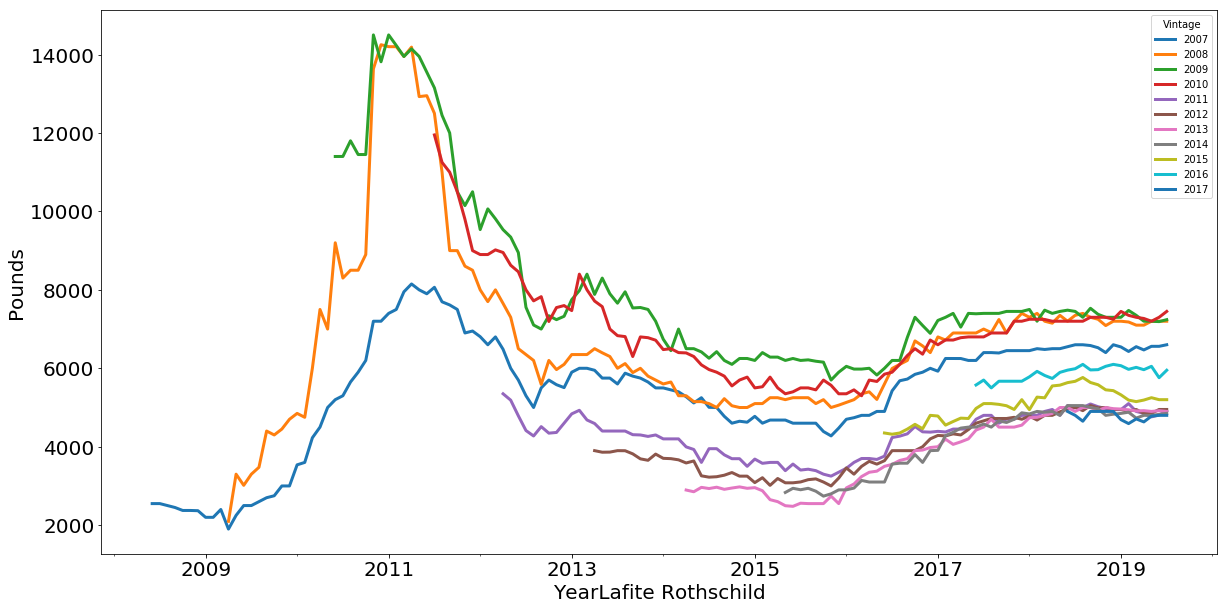

In [131]:
def plot_line_graph(wine):
    wine.plot(figsize=(20,10), linewidth=3, fontsize=20,kind='line')
    plt.xlabel(('Year'+str(wine_name[0])), fontsize=20)
    plt.ylabel('Pounds', fontsize=20)

In [12]:
def plot_boxchart(wine):
    plt.boxplot(wine)
    

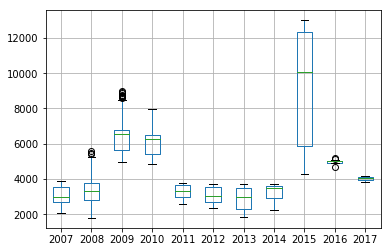

In [34]:
plot_boxchart(wine_list[4])

In [26]:
def get_rank(wine):
    for vintage in wine.columns:
        copy = wine[vintage].copy()
        print(vintage)
        print(copy.nlargest(5))

In [35]:
get_rank(wine_list[4])

2007
2018-08-31    3900.0
2018-09-30    3900.0
2018-10-31    3900.0
2019-01-31    3880.0
2019-03-31    3860.0
Name: 2007, dtype: float64
2008
2011-04-30    5580.0
2011-02-28    5450.0
2011-05-31    5400.0
2011-01-31    5226.0
2011-03-31    5200.0
Name: 2008, dtype: float64
2009
2010-06-30    9000.0
2011-04-30    8950.0
2011-03-31    8900.0
2010-12-31    8750.0
2010-11-30    8709.0
Name: 2009, dtype: float64
2010
2011-07-31    7962.0
2011-08-31    7800.0
2011-09-30    7800.0
2011-10-31    7800.0
2011-11-30    7200.0
Name: 2010, dtype: float64
2011
2012-10-31    3800.0
2012-11-30    3800.0
2012-05-31    3798.0
2013-02-28    3750.0
2013-03-31    3750.0
Name: 2011, dtype: float64
2012
2018-08-31    3700.0
2018-10-31    3700.0
2018-11-30    3700.0
2018-05-31    3694.0
2019-02-28    3660.0
Name: 2012, dtype: float64
2013
2018-10-31    3700.0
2018-11-30    3700.0
2018-09-30    3696.0
2018-08-31    3650.0
2019-02-28    3600.0
Name: 2013, dtype: float64
2014
2018-07-31    3700.0
2018-06-30    3

In [ ]:
def dot

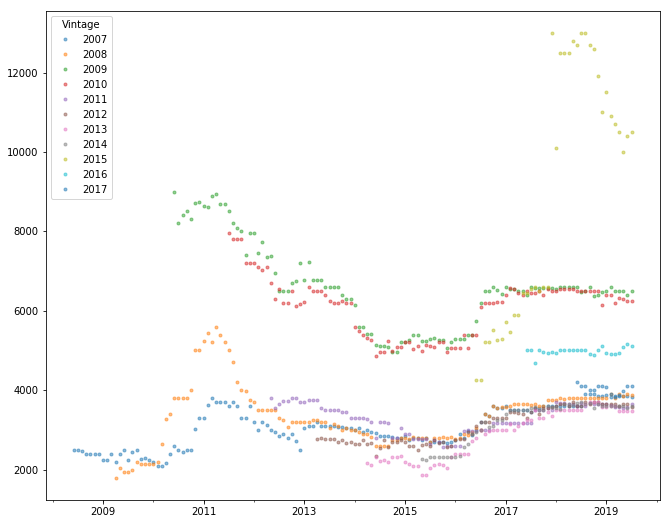

In [36]:
wine_list[4].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=False)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.86471928, 0.87803073, 0.89126623, 0.90433931, 0.91671318,
        0.92892508, 0.94049477, 0.95182489, 0.96212849, 0.97202855,
        0.98042851, 0.97710008, 0.97299585, 0.96791106, 0.9622893 ,
        0.95581758, 0.94816464, 0.94006397, 0.93136096, 0.92192247,
        0.91186981]),
 None)

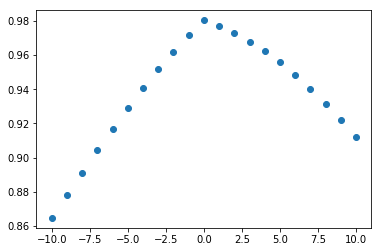

In [69]:
def plot_cross_corr(wine):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.xcorr(wine[2007].loc['2009-04-30':], wine[2008].loc['2009-04-30':], usevlines=False, maxlags=10, normed=True)

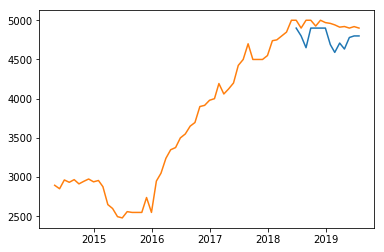

In [32]:
def plot_check_graph():
    plt.plot(wine[2017])
    plt.plot(wine[2013])
    plt.show()

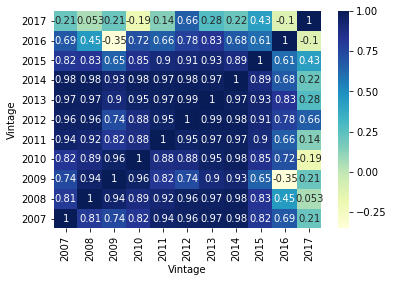

In [31]:
def plot_corr(wine):
    corr = wine.corr()
    ax = sns.heatmap(corr,cmap='YlGnBu',annot=True)
    ax.invert_yaxis()

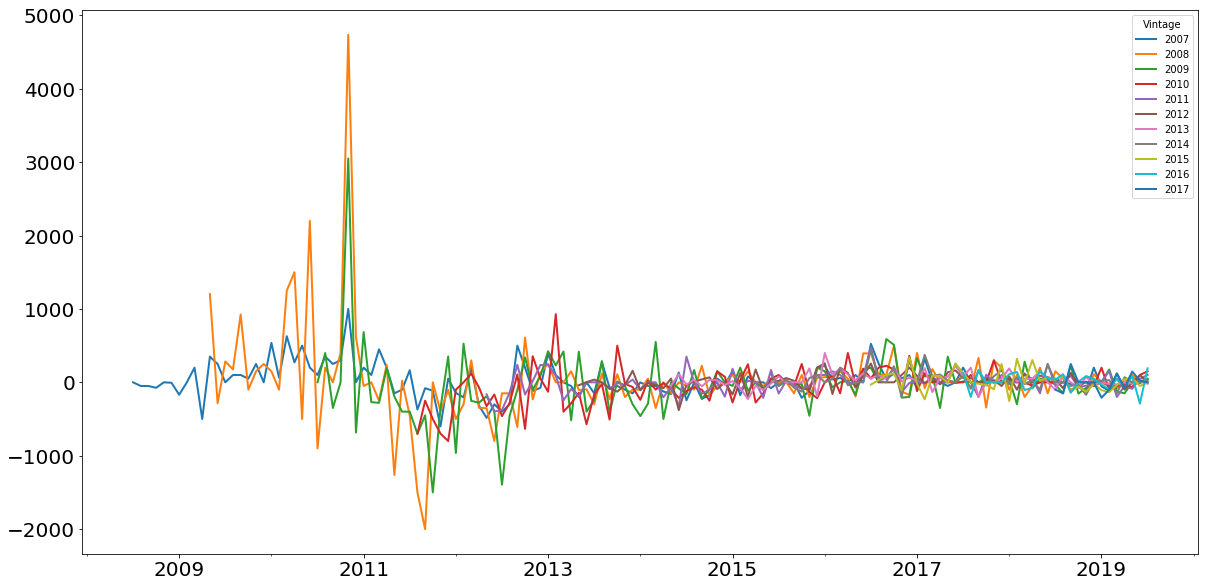

In [8]:
def plot_diff(wine):
#first-order differences; removing the trend may reveal correlation in seasonality.
    wine.diff().plot(figsize=(20,10), linewidth=2, fontsize=20)

In [9]:
wine.diff().corr()

Vintage,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Vintage,,,,,,,,,,,
2007,1.000000,0.528673,0.543886,0.311411,0.457173,0.141935,0.216927,0.542054,0.020093,0.310169,0.332626
2008,0.528673,1.000000,0.654470,0.274083,0.222684,0.084765,-0.033604,0.323909,0.157042,0.346402,-0.303849
2009,0.543886,0.654470,1.000000,0.333196,0.380731,0.279509,0.087001,0.130134,-0.194647,-0.301180,0.331831
2010,0.311411,0.274083,0.333196,1.000000,0.310573,0.070650,0.136412,0.118765,0.080626,-0.164026,-0.124451
2011,0.457173,0.222684,0.380731,0.310573,1.000000,0.345428,0.183628,0.539248,0.176069,-0.301490,-0.150362
2012,0.141935,0.084765,0.279509,0.070650,0.345428,1.000000,0.199010,0.177865,-0.041861,-0.279601,0.590192
2013,0.216927,-0.033604,0.087001,0.136412,0.183628,0.199010,1.000000,0.035307,0.057154,-0.135470,-0.104953
2014,0.542054,0.323909,0.130134,0.118765,0.539248,0.177865,0.035307,1.000000,0.213337,0.107748,-0.408694
2015,0.020093,0.157042,-0.194647,0.080626,0.176069,-0.041861,0.057154,0.213337,1.000000,0.154379,-0.146229


Autocorrelation
Auto-correlation is the comparison of a time series with itself at a different time. It aims, for example, to detect repeating patterns or seasonality. For example: “Is there weekly seasonality on a server website?”
Cross-correlation is the comparison of two different time series to detect if there is a correlation between metrics with the same maximum and minimum values.For example: “Are two audio signals in phase?”
shitf by time 



In [ ]:
#So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.
#how correlated the time series is with itself at that lag

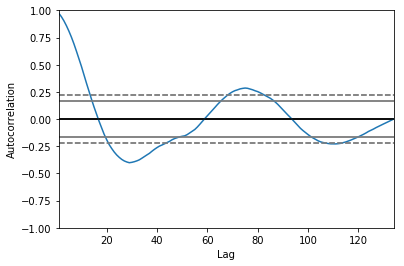

In [13]:
fig1 = pd.plotting.autocorrelation_plot(wine[2007])

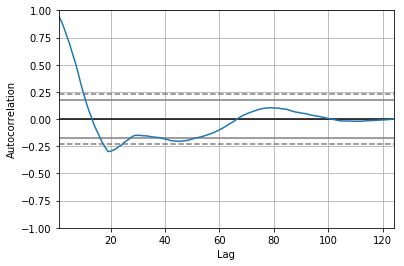

In [19]:
fig2 = pd.plotting.autocorrelation_plot(wine[2008].loc['2009-04-30':])

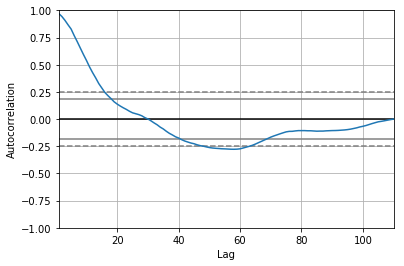

In [27]:
fig3 = pd.plotting.autocorrelation_plot(wine[2009].loc['2010-06-30':])

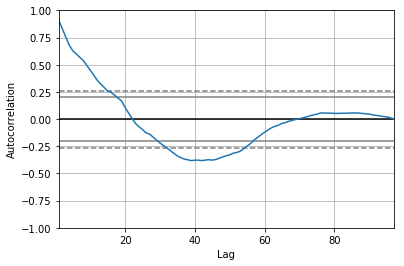

In [28]:
pd.plotting.autocorrelation_plot(wine[2010].loc['2011-07-31':])

In [18]:
release_date

0    2008-06-30
1    2009-04-30
2    2010-06-30
3    2011-07-31
4    2012-04-30
5    2013-04-30
6    2014-04-30
7    2015-05-31
8    2016-06-30
9    2017-06-30
10   2018-06-30
Name: Release Date, dtype: datetime64[ns]

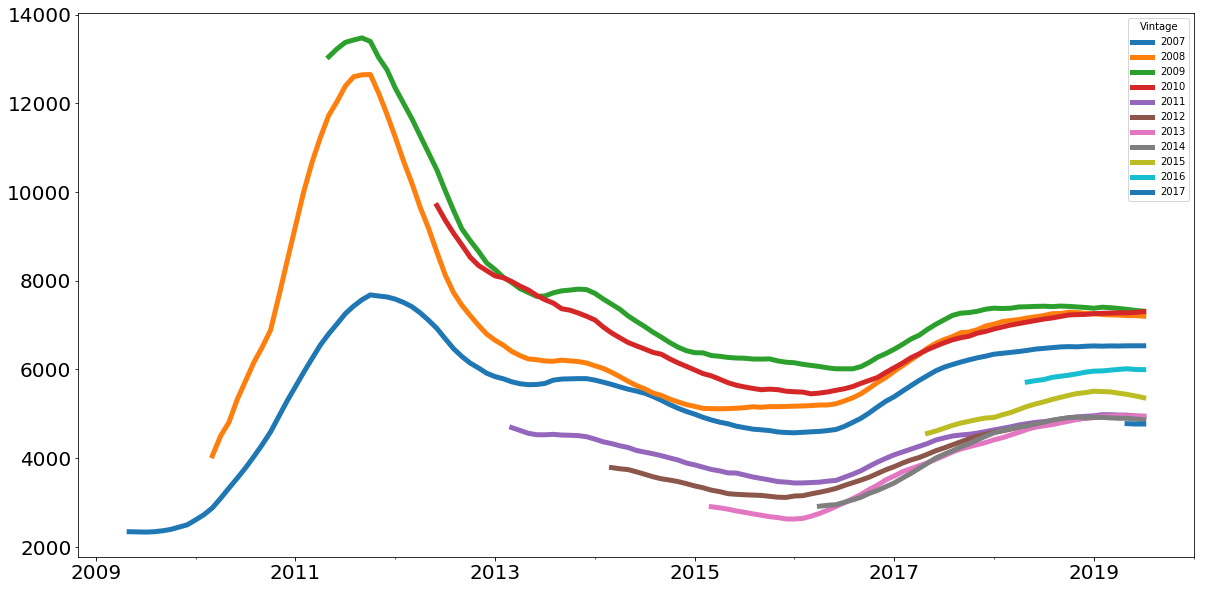

In [30]:
wine.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

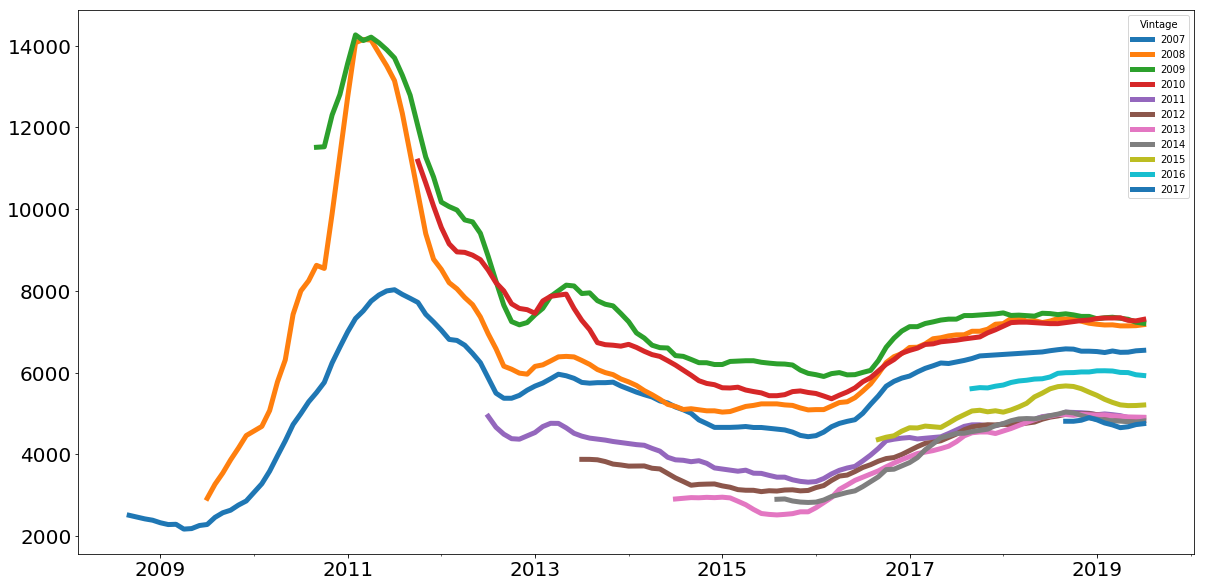

In [34]:
wine.rolling(4).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

resource = https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [ ]:
# assumption here: doesn't matter of vintage 
#we expect new launched wine have same path 
# by checking on data, wrong assumption 


In [54]:
#normalize cross correlation
a = wine[2008].loc['2009-04-30':]
b = wine[2007].loc['2009-04-30':]
a = (a - np.mean(a)) / (np.std(a) * len(a))
b = (b - np.mean(b)) / (np.std(b))
c = np.correlate(a, b, 'full')

In [55]:
len(c)

247

In [95]:

temp = pd.DataFrame({'2017':wine[2017].loc['2018-06-30':],'2018':wine[2016].loc['2018-06-30':]})

In [96]:
temp.corr()

,2017,2018
2017,1.000000,-0.103415
2018,-0.103415,1.000000


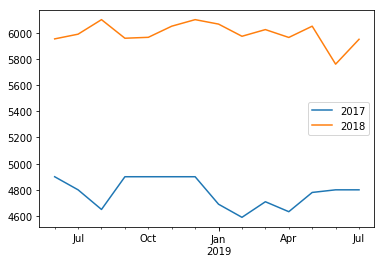

In [97]:
temp.plot()

In [103]:
temp.rolling(6).mean()['2018-11-30':].corr()


,2017,2018
2017,1.000000,0.487675
2018,0.487675,1.000000


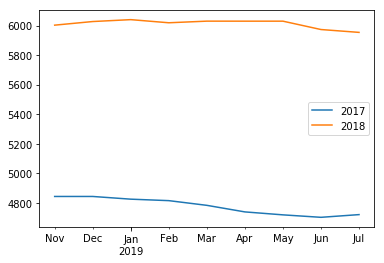

In [104]:
temp.rolling(6).mean()['2018-11-30':].plot()

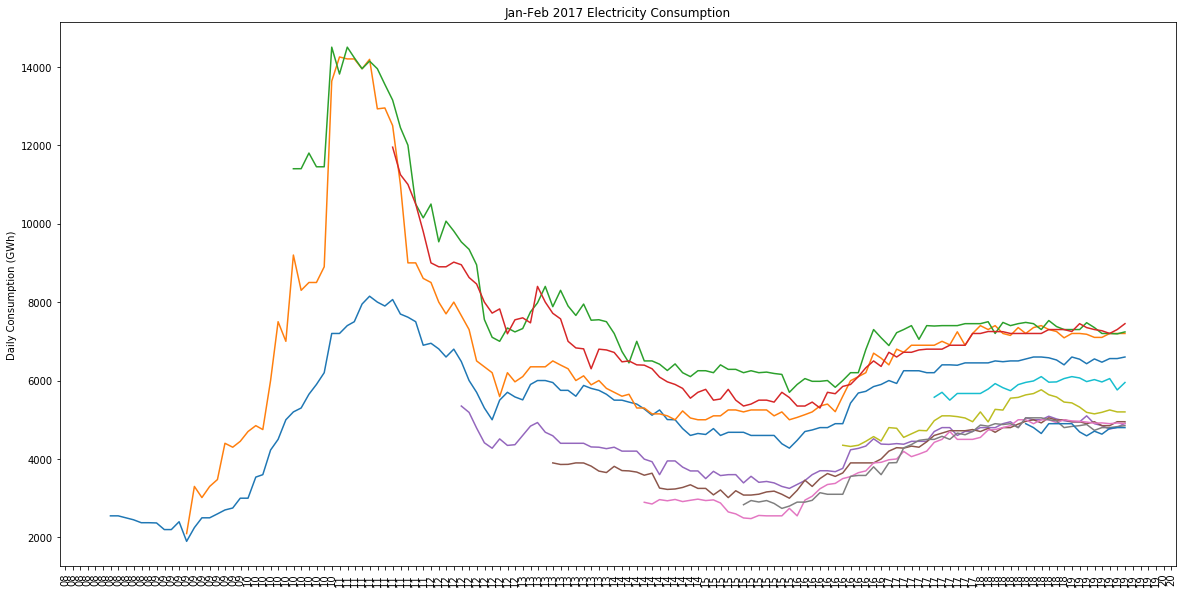

In [119]:

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)

#ax.plot(wine[2007], marker='o', linestyle='-')
ax.plot(wine, linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Format x-tick labels as 3-letter month name and day number

ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'));